# Introduction
In this worksheet you will write functions to implement evaluation metrics for classification and regression problems. You will:
 - Use library functions from scikit-learn (https://scikit-learn.org/stable/)
 - Use NumPy and matplotlib
 - Write and call functions in Python
 - Gain understanding of the evaluation metrics used.


Scikit-learn (https://scikit-learn.org/stable/) is a Python library with a wide range of ML algorithms. We will be using some of these algorithms during this course, but we will also be looking at the principles behind the algorithms in order to understand these rather than simply applying functions from libraries.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a 'magic' function `%matplotlib inline` to display plots in the worksheet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Classification
In this question you will use a toy dataset from scikit-learn. You will use functions from scikit-learn to load the data, divide it into training and testing sets, and then fit a simple classifier to the training set. You will then write functions to calculate accuracy, precision, and recall. Finally, you will check your functions against the functions from scikit-learn.

## Part a) Load the data

In [56]:
# scikit-learn comes with a number of toy datasets (https://sklearn.org/datasets/index.html#toy-datasets)
from sklearn import datasets
import pandas as pd 

# Load the wine dataset from sklearn. You may want to take a look at the format of the dataset
wine = datasets.load_wine()

# Creating a DataFrame from the dataset for easier manipulation
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Save the datapoints into the variable X and the targets into the variable y
X = wine.data 
y = wine.target

In [57]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [16]:
#data point ออกมารูป array
type(X)

numpy.ndarray

In [3]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Take a look at the target values in y. What do you notice about these? Why are these suitable for a classification algorithm rather than a regression algorithm?

In [ ]:
#  ดู class ของ wine dataset
set(y)
# print(y)

{0, 1, 2}

## Part b) Divide the data into training and testing sets
Use the function `train_test_split` from `sklearn.model_selection` to split out the data and targets into training and testing sets.

In [9]:
# We import the function train_test_split from sklearn and use this to split the data
from sklearn.model_selection import train_test_split

# The function returns splits of each array passed in. 
# The proportion to be used as the training set is given by test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train

array([[1.176e+01, 2.680e+00, 2.920e+00, ..., 1.230e+00, 2.500e+00,
        6.070e+02],
       [1.270e+01, 3.550e+00, 2.360e+00, ..., 7.800e-01, 1.290e+00,
        6.000e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       ...,
       [1.371e+01, 5.650e+00, 2.450e+00, ..., 6.400e-01, 1.740e+00,
        7.400e+02],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.324e+01, 3.980e+00, 2.290e+00, ..., 8.200e-01, 3.000e+00,
        6.800e+02]])

## Part c) Import the k-nearest neighbours classifier and run it on the data
Scikit-learn has a huge range of *estimators* that you can use with your dataset. An estimator is any procedure that can be used to fit data and make predictions from it. Here we will import the k-nearest neighbours classifier, instantiate it, run it on our training set, and then use it to generate some predictions. You will learn more about k-nearest neighbours in Week 14. For now, we are simply using it to generate some predictions.

The general procedure for using the estimators in scikit-learn is as follows. Every estimator has a method `fit(X, y)` and a method `predict(T)`. 

1) Import the estimator
    e.g. `from sklearn.models import Classifier`
    
2) Instantiate the estimator to a variable
    e.g. `est = Classifier(hparams)`
    
3) Fit the estimator to the data
    e.g. `est.fit(X, y)`
    
4) Make a prediction
    e.g. `predictions = est.predict(test_data)`
    
You can see an example of this in the code below:

In [18]:
# We first import the classifier
from sklearn.neighbors import KNeighborsClassifier

# We instantiate the classifier with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

# We fit the model using our training data
knn.fit(X_train, y_train)

# Finally, we generate predictions on the test data
ypred_test=knn.predict(X_test)

## Part d) Evaluating the classifier
In this section we will implement functions for accuracy, precision and recall, and compare them with the functions given in sklearn (they should give the same results!)

The wine dataset has 3 classes. We will write functions to compute the accuracy of the classifer, the macro-averaged precision and the macro-averaged recall.

Recall the equations for accuracy, precision, and recall:

$$Accuracy = \frac{\text{Number correct}}{\text{Total datapoints}}$$
i.e. the number of correctly classified datapoints as a proportion of all $n$ datapoints

$$Precision_c = \frac{TP_c}{TP_c+FP_c}$$
i.e. the precision for class $c$ is the number of true positives for class $c$ as a proportion of the total number of positive predictions for class $c$

$$Recall_c = \frac{TP_c}{TP_c+FN_c}$$
i.e. the recall for class $c$ is the number of true positives for class $c$ as a proportion of the total number of actual positives for class $c$

The macro-averaged precision and macro-averaged recall are then simply calculated by averaging the precision (or recall) for each class:

$$Precision = \frac{1}{k} \sum_{c = 1}^k Precision_c, \quad Recall = \frac{1}{k} \sum_{c = 1}^k Recall_c$$

We can automatically generate the confusion matrix for our data using the function `confusion_matrix` from `sklearn.metrics`

In [19]:
# Import the function confusion_matrix
from sklearn.metrics import confusion_matrix

#Build the confusion matrix from the target test set y_test and our predicted values ypred_test
cm = confusion_matrix(y_test, ypred_test)

Take a look at the confusion matrix. What should its dimensions be? 

In [20]:
# Look at the confusion matrix cm
print(cm)

#(i,j)

[[14  0  0]
 [ 1 13  3]
 [ 0  3  2]]


## 🔍 โครงสร้างของ Confusion Matrix

| **Actual \ Predicted** | **Predicted 0** | **Predicted 1** |
|----------------------|-----------------|-----------------|
| **Actual 0**  | **True Negative (TN)** | **False Positive (FP)** |
| **Actual 1**  | **False Negative (FN)** | **True Positive (TP)** |

In [21]:
type(y)

numpy.ndarray

(**Optional**) Write a function `my_accuracy` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns accuracy.

In [22]:
import pandas as pd

def my_accuracy(y, pred):
    """
    Calculate accuracy given target values and predicted values using Pandas.
    
    Parameters:
    y (array-like): Array of true target values.
    pred (array-like): Array of predicted values.
    
    Returns:
    float: Accuracy score (proportion of correct predictions).
    """
    df = pd.DataFrame({'y': y, 'pred': pred})
    acc = sum(df['y'] == df['pred']) / len(df)
    return acc


In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
my_accuracy(y_test, ypred_test) 

0.8055555555555556

In [24]:
accuracy_score(y_test, ypred_test)

0.8055555555555556

(**Optional**) Check that your functions match those in sklearn.

In [25]:
recall_score(y_test, ypred_test, average='macro')

0.7215686274509804

In [28]:
recall_score(y_test, ypred_test, average='weighted')

0.8055555555555556

In [26]:
precision_score(y_test, ypred_test, average='macro')


0.7152777777777778

In [29]:
precision_score(y_test, ypred_test, average='weighted')


0.8021990740740741

- macro → ให้ความสำคัญกับทุกคลาสเท่ากัน (แม้ว่าจะมีคลาสที่มีตัวอย่างน้อย)
- weighted → ให้ความสำคัญกับคลาสที่มีตัวอย่างเยอะ (เหมาะกับกรณีที่คลาสไม่สมดุล)
- micro → ดูผลลัพธ์โดยรวมของโมเดลโดยไม่แยกคลาส


🔥 ถ้าไม่แน่ใจว่าเลือกอะไรดี → ลองใช้ weighted ก่อน เพราะช่วยปรับสมดุลจากจำนวนตัวอย่างของแต่ละคลาส! 😃









# 2. Regression

In this question we will use sklearn to fit a linear model to some artificial data. You will then implement a function to calculate the mean squared error and a function to calculate $r^2$.

The model we fit is just a line, i.e. $y = ax + b$. 

## Part a) Create an artificial dataset
We start off by creating some artificial data that is a line with some noise added.

In [36]:
X = np.linspace(0, 10, 101)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [37]:
# We set up a random number generator (rng), seeded with a number (in this case 10). 
# Using a seed means we can generate the same sequence of pseudorandom numbers, and so we can check results easily.
rng = np.random.default_rng(10)  # np.random.default_rng(10) สร้าง Random Number Generator (RNG) โดยใช้เมล็ด (seed) เป็นตัวเลข 10 เพื่อให้การสุ่มเลขนั้นสามารถทำซ้ำได้ (reproducible).

# Seed ช่วยให้การสุ่มตัวเลขในอนาคต (ถ้าใช้ seed เดียวกัน) ผลลัพธ์จะเหมือนเดิมทุกครั้ง ซึ่งมีประโยชน์ในการตรวจสอบผลลัพธ์หรือทดสอบซ้ำ

# a and b are coefficients for the line
a = 2 #slope
b = -1 # y intercept

# Use np.linspace to generate datapoints from 0 to 10 (inclusive) spaced at 0.1
X = np.linspace(0, 10, 101) 

# Create data Y using the equation for a line
Y = a*X + b # ผลลัพธ์ที่ได้จะเป็นข้อมูลที่มีการกระจายตัวตามสมการเชิงเส้น. Y=2X−1.

# Adds Gaussian noise with mean 0 and standard deviation 3 to the data
Y = Y + 3*rng.standard_normal(len(Y))  # เพิ่ม Gaussian noise ที่มีค่าเบี่ยงเบนมาตรฐาน 3 ให้กับ Y เพื่อจำลองความผันผวนหรือข้อผิดพลาดในข้อมูลที่เกิดจากการทดลองในโลกจริง.

## Part b) Plot the data on named axes

Text(0, 0.5, 'y')

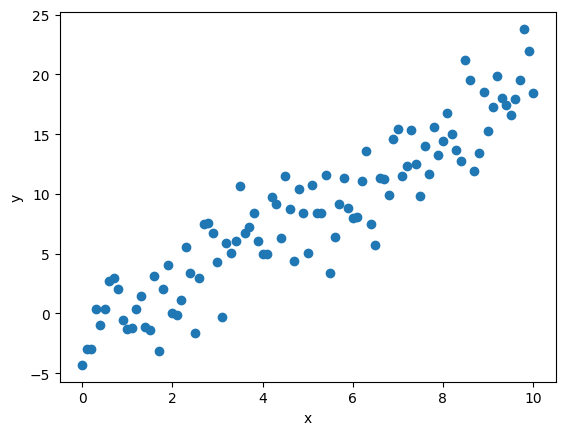

In [38]:
fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(X, Y, label = 'Data') # We generate a scatterplot of the data on the axes.
plt.xlabel('x')
plt.ylabel('y')

## Part c) Split the data into training and testing sets
Split the data X and targets Y into training and testing sets using the function `train_test_split`. Set the proportion of the dataset to use as test data to 0.1.

In [39]:
# Write your answer here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train

array([ 8.7,  0.3,  5.2,  9.6,  6.6,  3.3,  7.2,  8.8,  5.3,  2.9,  9.9,
        4.6,  1.2,  0.8,  8. ,  5.1,  7.7,  9.1,  4. ,  8.6,  1.4,  2. ,
        1.3,  9.3,  0.4,  1.1,  4.3,  2.8,  3.9,  8.9,  6.1,  8.3,  9.4,
        9.8,  5.7,  6.8,  7.3,  7.8,  3.5,  3.1,  6.2,  8.5,  9.5,  0.6,
        7.5,  0. ,  5.6,  3.4,  4.5,  4.1,  2.7,  1.8,  5. ,  5.8,  7.4,
        2.3,  6.9,  2.5,  9.7,  2.4,  4.8,  7.1,  0.9,  3.2,  4.2,  2.6,
        6.7,  6.4,  0.5,  1.5,  6.5,  8.2,  1.9,  4.9,  3. ,  8.1,  7.6,
        5.9,  5.4,  0.1,  4.4,  5.5,  2.1,  6. ,  1. ,  7.9,  2.2, 10. ,
        6.3,  8.4])

## Part d) Instantiate and fit the estimator
Import the estimator `LinearRegression` from `sklearn.linear_model` and instantiate it. No parameters are needed.

In [40]:
# Write your answer here
# We first import the classifier
from sklearn.linear_model import LinearRegression

# We instantiate the classifier with 5 neighbours
reg = LinearRegression()

You will need to reshape the data (but not the targets) before passing it to this model. 

In [41]:
# This reshapes the data to have 1 column and however many rows make sense for the data
X_train = X_train.reshape(-1, 1) # ในการฝึกโมเดล machine learning (เช่น regression หรือ classification) โมเดลบางประเภท (เช่น linear regression หรือ neural networks) ต้องการให้ข้อมูลในรูปแบบ 2 มิติ:

การที่ **K-Nearest Neighbors (KNN)** **ไม่ต้อง Reshape** แต่ **Logistic Regression (LR) ต้อง Reshape** มาจาก **โครงสร้างของโมเดลและไลบรารีที่ใช้** 🔥

---

## 📌 **KNN (`KNeighborsClassifier`)**
- `KNeighborsClassifier` **รองรับ input ที่เป็น 1D array ได้**
- ในการทำนาย (`predict()`), KNN ใช้ระยะห่างระหว่าง **เวกเตอร์ข้อมูล** ดังนั้น **ไม่ต้อง reshape** หากมีเพียง 1 feature  


## 📌 **Logistic Regression (`LogisticRegression`)**
- `LogisticRegression` ต้องการ `X_train` และ `X_test` ในรูปแบบ **2D array (n_samples, n_features)**
- ถ้าข้อมูลที่ใช้มีเพียง 1 feature (vector 1D) เช่น `[1, 2, 3, 4]` → ต้อง **reshape** เป็น `[ [1], [2], [3], [4] ]`
- เพราะ `LogisticRegression` ใน sklearn ใช้ **matrix operations** ที่ต้องมีอย่างน้อย `n_features=1`



## 🎯 **สรุป**
| โมเดล | **ต้อง Reshape?** | **เหตุผล** |
|--------|------------------|----------------|
| **KNN** | ❌ **ไม่ต้อง** | รองรับ input เป็น list หรือ 2D array |
| **Logistic Regression** | ✅ **ต้อง** | ใช้ matrix operations ที่ต้องมีอย่างน้อย `n_features=1` |

**🔥 ถ้าใช้ `sklearn`, ถ้าพบ `Expected 2D array, got 1D array` → แก้ด้วย `.reshape(-1, 1)`** 😃

In [42]:
X_train

array([[ 8.7],
       [ 0.3],
       [ 5.2],
       [ 9.6],
       [ 6.6],
       [ 3.3],
       [ 7.2],
       [ 8.8],
       [ 5.3],
       [ 2.9],
       [ 9.9],
       [ 4.6],
       [ 1.2],
       [ 0.8],
       [ 8. ],
       [ 5.1],
       [ 7.7],
       [ 9.1],
       [ 4. ],
       [ 8.6],
       [ 1.4],
       [ 2. ],
       [ 1.3],
       [ 9.3],
       [ 0.4],
       [ 1.1],
       [ 4.3],
       [ 2.8],
       [ 3.9],
       [ 8.9],
       [ 6.1],
       [ 8.3],
       [ 9.4],
       [ 9.8],
       [ 5.7],
       [ 6.8],
       [ 7.3],
       [ 7.8],
       [ 3.5],
       [ 3.1],
       [ 6.2],
       [ 8.5],
       [ 9.5],
       [ 0.6],
       [ 7.5],
       [ 0. ],
       [ 5.6],
       [ 3.4],
       [ 4.5],
       [ 4.1],
       [ 2.7],
       [ 1.8],
       [ 5. ],
       [ 5.8],
       [ 7.4],
       [ 2.3],
       [ 6.9],
       [ 2.5],
       [ 9.7],
       [ 2.4],
       [ 4.8],
       [ 7.1],
       [ 0.9],
       [ 3.2],
       [ 4.2],
       [ 2.6],
       [ 6

Call the method `fit` with your training data to train the model

In [43]:
y_train

array([11.88904171,  0.40092757,  8.36555045, 17.94073218, 11.30787147,
        5.07206671, 12.36664578, 13.4426937 ,  8.42297219,  6.69012585,
       21.99500934,  8.75299444,  0.36843543,  2.02555093, 14.43254329,
       10.74645454, 11.68730248, 17.24549024,  5.00693099, 19.51982582,
       -1.11682103,  0.04393318,  1.44585972, 17.98636731, -0.94574219,
       -1.24444232,  9.11365808,  7.55114603,  6.03029328, 18.55203613,
        8.04273074, 13.69795135, 17.41235087, 23.8042998 ,  9.12643948,
        9.87305863, 15.3100876 , 15.57584015, 10.62691233, -0.33481963,
       11.04812054, 21.16320995, 16.5792024 ,  2.72912771,  9.79056685,
       -4.31001535,  6.36809933,  6.03039959, 11.45808596,  4.98788086,
        7.4416904 ,  2.06883948,  5.01359453, 11.34749073, 12.51236214,
        5.54407377, 14.6352283 , -1.6087917 , 19.56005278,  3.41050593,
       10.4176369 , 11.5074973 , -0.55230579,  5.90873319,  9.70089945,
        2.92995267, 11.25394561,  7.44999366,  0.37944915, -1.40

In [44]:
# Write your answer here
reg.fit(X_train, y_train)

LinearRegression()

The coefficient(s) and intercept for the trained model ($a$ and $b$ in our case) are called `coef_` and `intercept_`. Are these what you would expect? Are they similar to the values of `a` and `b` that we used to generate the data?

In [45]:
# Look at coef_ and intercept_
intercept = reg.intercept_
print(intercept)

-2.044351441238083


In [46]:
coeficients = reg.coef_
coeficients = coeficients.astype(float).item()
print(coeficients)

2.0809875644972324


Using the values stored in `coef_` and `intercept_`, plot a line representing the fitted model on the same axes (`ax`) as before. Type `fig` to view the plot.

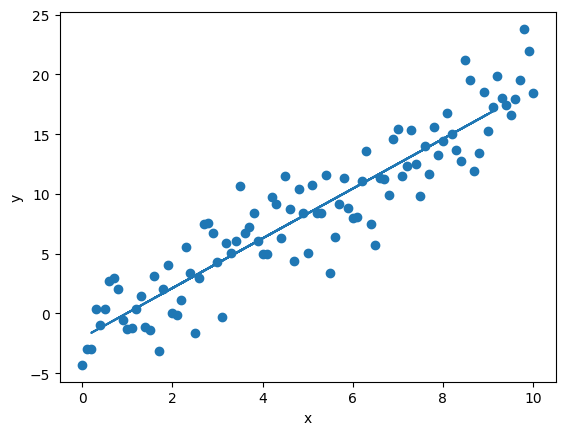

In [47]:
# Write your answer here 
x_value = X_test
y_value = coeficients * x_value + intercept # y_ored , x จริง

ax.plot(x_value, y_value)
fig


Reshape the test data to have one column and then call `predict` on the regression model to get the predicted y values

In [48]:
X_test

array([0.7, 3.6, 3.7, 9.2, 7. , 0.2, 9. , 1.6, 4.7, 3.8, 1.7])

In [49]:
X_test = X_test.reshape(-1, 1)
# Call predict on the regression model and assign the output to 
ypred = reg.predict(X_test)
# a variable ypred
ypred

array([-0.58766015,  5.44720379,  5.65530255, 17.10073415, 12.52256151,
       -1.62815393, 16.68453664,  1.28522866,  7.73629011,  5.8634013 ,
        1.49332742])

Check your function against the function `mean_squared_error` from `sklearn.metrics`

In [50]:
# Write your answer here
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred)


7.2105689226030485

## 🎯 **MSE สูงแค่ไหนถึงว่า "แย่"?**  
ขึ้นอยู่กับ **ช่วงของ y_true** (ค่าจริง)  

| **ค่า y_true (Target)** | **MSE ต่ำ (ดี)** | **MSE สูง (แย่)** |
|----------------|----------------|----------------|
| 0 - 10        | < 1            | > 10          |
| 0 - 100       | < 10           | > 100         |
| 0 - 1000      | < 100          | > 1000        |


In [51]:
# Compare with sklearn.metrics.r2_score
from sklearn.metrics import r2_score
r2_score(y_test, ypred)


0.8546863342051704

# 3. Using cross-validation for model selection

In this section we will fit a series of classifiers with different parameter settings, and use k-fold cross validation to select the most appropriate parameter values. We will use a *decision tree* classifier. We will cover this classifier in more detail in future lectures. For now, all you need to know is that a decision tree has a parameter `max_depth` that says how many layers the tree may have. More layers means that the tree can divide up the feature space into finer classes, but this could come at the expense of overfitting.

## Part a) 
We first of all create an artificial dataset with 2000 samples, 10 features, and 4 classes.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [62]:
# โหลด Iris dataset
iris = datasets.load_iris()

# สร้าง DataFrame จากข้อมูล dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# เพิ่มคอลัมน์ 'target' เพื่อบ่งชี้ประเภทของดอกไม้
iris_df['target'] = iris.target

# แสดง DataFrame แรก ๆ
print(iris_df.head())

# ถ้าคุณต้องการแยกข้อมูลออกเป็น X และ y:
X = iris.data  # ข้อมูล features
y = iris.target  # ข้อมูล labels (ชนิดของดอกไม้)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ลองค่าต่าง ๆ ของ max_depth
max_depth_values = [1, 2, 3, 4, 5, 10, None]  # None หมายถึงไม่มีการจำกัดความลึก
cv_scores = []

# ใช้ k-fold cross-validation (k=5)
for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # ใช้ accuracy เป็น metric
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)
    print(f"max_depth={depth}, Mean CV Accuracy: {mean_score:.4f}")

# หาค่า max_depth ที่ดีที่สุด
best_depth = max_depth_values[np.argmax(cv_scores)]
print(f"\nBest max_depth: {best_depth}, Best Accuracy: {max(cv_scores):.4f}")


max_depth=1, Mean CV Accuracy: 0.6750
max_depth=2, Mean CV Accuracy: 0.9167
max_depth=3, Mean CV Accuracy: 0.9333
max_depth=4, Mean CV Accuracy: 0.9417
max_depth=5, Mean CV Accuracy: 0.9333
max_depth=10, Mean CV Accuracy: 0.9417
max_depth=None, Mean CV Accuracy: 0.9417

Best max_depth: 4, Best Accuracy: 0.9417



#### **ส่วนประกอบของฟังก์ชัน**:
1. **`model`**: คือโมเดลที่คุณต้องการประเมิน เช่น `LogisticRegression()`, `KNeighborsClassifier()`, หรือโมเดลอื่น ๆ ที่คุณใช้งาน
2. **`X_train`**: คือข้อมูล **feature** ของชุดการฝึก (training set) ซึ่งเป็นข้อมูลที่ใช้ในการฝึกโมเดล
3. **`y_train`**: คือ **labels** หรือคำตอบที่ตรงกับ **X_train** (ข้อมูล target ของชุดการฝึก)
4. **`cv=5`**: เป็นจำนวน **folds** ที่ใช้ในการทำ **k-fold cross-validation** (ในที่นี้ใช้ 5-fold cross-validation)
   - ข้อมูลจะถูกแบ่งออกเป็น 5 ส่วน โดยที่ในแต่ละรอบการทดสอบจะเลือก 1 ส่วนเป็นชุดข้อมูลทดสอบ และใช้ที่เหลือ 4 ส่วนในการฝึกโมเดล
5. **`scoring='accuracy'`**: ใช้ **accuracy** เป็นตัวชี้วัดประสิทธิภาพของโมเดล โดยค่าผลลัพธ์ที่ได้จาก `cross_val_score()` จะเป็น **ค่า accuracy** ของโมเดลในแต่ละ fold
   - **Accuracy** หมายถึงอัตราความถูกต้อง ซึ่งคำนวณจากจำนวนตัวอย่างที่ทำนายถูกต้องหารด้วยจำนวนตัวอย่างทั้งหมด

### **ทำไมถึงใช้ `cross_val_score`?**

- **ประเมินโมเดลอย่างแม่นยำ**: โดยการใช้ **cross-validation** ทำให้สามารถประเมินโมเดลได้ดีกว่าการใช้แค่ชุดทดสอบหนึ่งชุด เนื่องจากมันช่วยลดความเสี่ยงจากการที่ชุดทดสอบไม่เป็นตัวแทนที่ดีของข้อมูลทั้งหมด
- **หลีกเลี่ยง Overfitting**: การใช้ข้อมูลหลายชุดในการทดสอบช่วยป้องกันไม่ให้โมเดล **overfit** (จำเฉพาะข้อมูลชุดฝึกมากเกินไป)
- **ค่าคะแนนจากหลาย fold**: ฟังก์ชันจะคืนค่าคะแนนจากแต่ละ fold ซึ่งคุณสามารถใช้ในการประเมินค่าประสิทธิภาพเฉลี่ยของโมเดล

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# โหลดข้อมูล iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# กำหนดพารามิเตอร์ที่ต้องการค้นหา
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, None],  # ทดลองหลายค่าของ max_depth
    'min_samples_split': [2, 5, 10],        # ทดลองค่าของ min_samples_split
}

# สร้าง DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อลองหาค่าที่ดีที่สุด
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) #  n_jobs=-1 จะให้ใช้ ทุก CPU core ที่มีในเครื่อง 
# จะทำให้การประมวลผลทำงานได้เร็วขึ้น เพราะสามารถทำงานในหลายๆ กระบวนการพร้อมกันได้

# เทรนโมเดล
grid_search.fit(X_train, y_train)

# ดูผลลัพธ์
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

# ทำนายด้วยโมเดลที่ดีที่สุด
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.9417
Test Accuracy: 1.0000
